# **Thresholding**
<hr/>

**Objectives:**

Learning to enhance image contrast through histogram equalization.

Developing the ability to create masks using various thresholding techniques, such as Otsu's method, binary thresholding, and local thresholding methods.

# Importing the necessary libraries

In [2]:

import numpy as np 
import matplotlib.pyplot as plt
from scipy import signal
import cv2
import timeit
start = timeit.default_timer()

# Loading the image
Read the image and assign it to `img` using OpenCV.

In [3]:
file_path = r'D:\CV\images\Frogrbc1000x.jpg' 

In [4]:
img = cv2.imread(file_path)



# Display the image

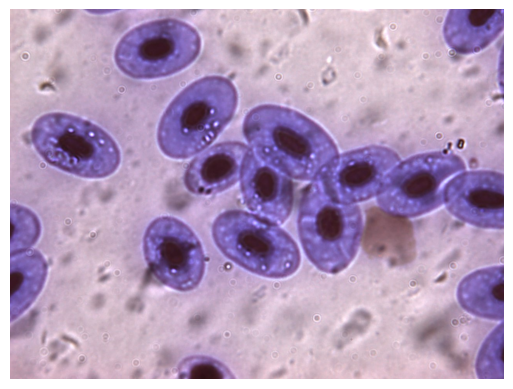

In [5]:
# Displaying the image
plt.imshow(img, cmap='gray')
plt.axis('off')  
plt.show()

# Loading in grayscale form
First, let's convert Our image to $grayscale.$

In [6]:
gray_image = cv2.imread(file_path, 0)

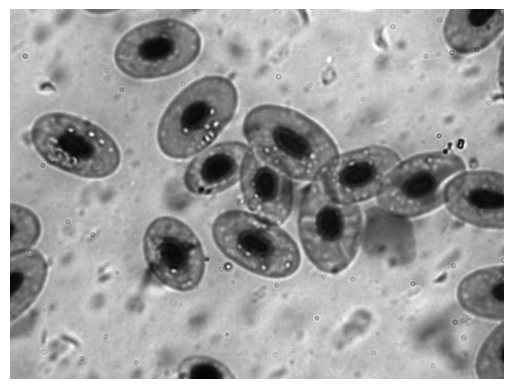

In [7]:
plt.imshow(gray_image, cmap='gray')
plt.axis('off')  
plt.show()

## Histogram

_Define max value and min value for 8-bit grayscale Image._


We have an 8-bit grayscale image. Let's define max_value and min_value. 

In grayscale Image pixel intensity value ranges from $0$ $to$ $2^8 = 256.$ Here we will follow this range as `min` and `max

In [8]:
max_val = 255
min_val = 0

_Plot the histogram of grayscale Image ._

The given function plots histogram for a given Image `img.` We already know the max and min value of the 8-bit grayscale Image. Plot the histogram of an Image using OpenCV [calcHist()]


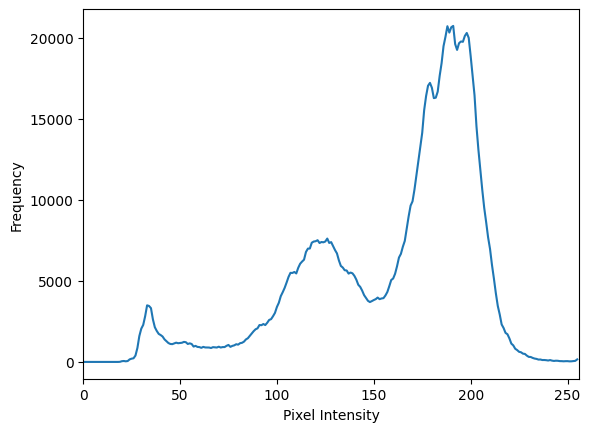

In [9]:

def plot_histogram(img):
    # Calculate the histogram and assign it to histr 
    histr = cv2.calcHist([img], [0], None, [256], [0, 256])
    return histr  # Return the calculated histogram

# Calculating the histogram of the grayscale image
histogram = plot_histogram(gray_image)

# Plotting the histogram
plt.plot(histogram)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 256])  
plt.show()

## Histogram equalization
Brightness and contrast adjustments described in section $Simple~~point~~ operators$ may improve a picture's appearance, how do we automatically determine its best values? Histogram equalization is the solution.

Histogram equalization is a method in image processing of contrast adjustment using the image's histogram. In this section, You will learn to equalize the Image pixel intensity distribution using histogram equalization.

This method improves the contrast in an image, in order to stretch out the intensity range. Apply histogram equalization in a  grayscale image.

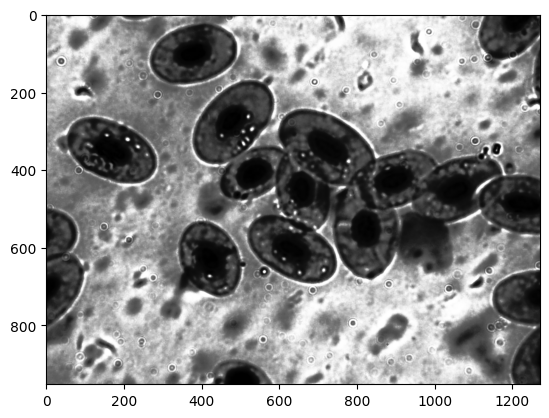

In [10]:
equ_img = cv2.equalizeHist(gray_image)

# Display the equalized image
plt.imshow(equ_img, cmap='gray')
plt.show()

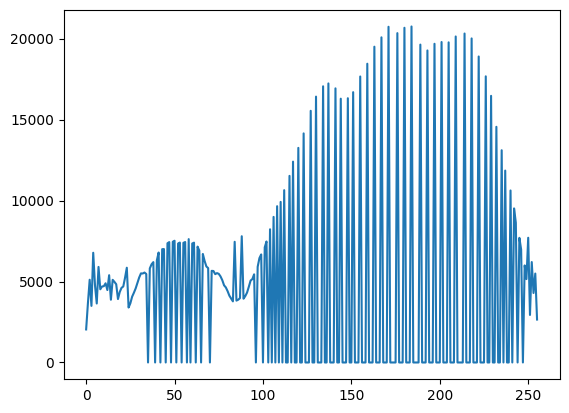

In [11]:
histogram = plot_histogram(equ_img)
plt.plot(histogram)
plt.show()

## Thresholding Techniques
Thresholding is used to segment images, mostly in the foreground and background. Our cell.PNG Image contains Red Blood Cell [Histology](https://en.wikipedia.org/wiki/Histology). In this assignment section, we will use different thresholding techniques with this Image to see the histology of red blood cells.

As we already know, OTSU finds the optimal value of the global threshold. First, we will find the optimal value of the threshold and apply different global thresholding technique.

__Here, we will: Find the value of the optimal threshold using OTSU and Image after applying an optimal threshold.__

__Use value of optimal threshold as a global threshold and apply different global thresholding techniques.__ 

The grayscale image is blurred using a box filter. You will learn about the box filter on upcoming chapters. For now, let's blur the picture.

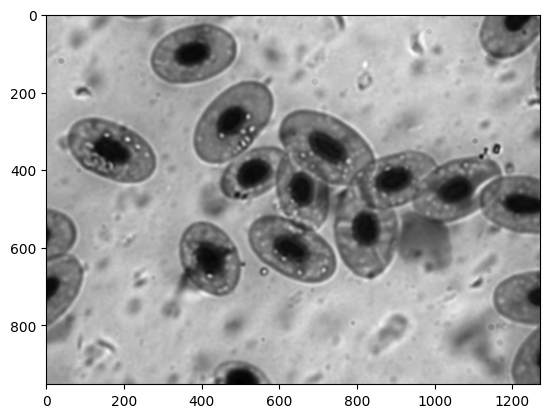

In [12]:
blured_gray_image = cv2.blur(gray_image,(7,7),0)
plt.imshow(blured_gray_image,cmap='gray')

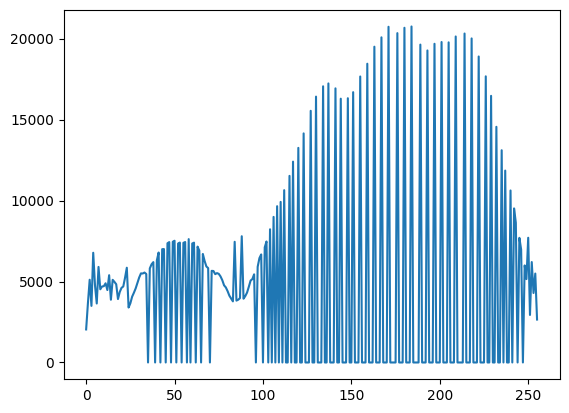

In [13]:
medianhist = plot_histogram(blured_gray_image)
plt.plot(histogram)
plt.show()

### __Finding the value of the optimal threshold using OTSU and Image after applying an optimal threshold.__


If we ignore the peak around point 40, the Image Histogram of grayscale Image is bimodal. We can use optimal thresholding(OTSU) to identify the threshold's value to segment the Image. For now, we want only cell Image and remove everything outside the cell that is the background. 

Here, we will:

- Find the value of the optimal threshold and the Image after applying an optimal threshold
- To find the value of the optimal threshold and the Image after applying the optimal threshold, Use THRESH_TRUNC + THRESH_OTSU.
   
Note: 

- Use blured_gray_image.

In [14]:
optimal_threshold = None
image_after_optimal_threshold = None
# Applying OTSU's thresholding with THRESH_TRUNC
optimal_threshold, image_after_optimal_threshold = cv2.threshold(
    blured_gray_image, 0, 255, cv2.THRESH_TRUNC + cv2.THRESH_OTSU
)

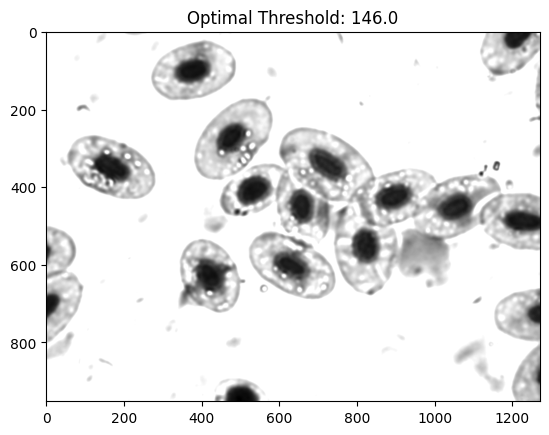

In [16]:
# Displaying the thresholded image
plt.imshow(image_after_optimal_threshold, cmap='gray')
plt.title(f"Optimal Threshold: {optimal_threshold}")
plt.show()